In [1]:
!pip install textblob

In [2]:
!pip install wordcloud


# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import nltk

In [4]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Importing Dataset

In [5]:
data = pd.read_csv("tweets.csv")


In [6]:
print(data.head())
print(data.dtypes)

      author                                            content country  \
0  katyperry  Is history repeating itself...?#DONTNORMALIZEH...     NaN   
1  katyperry  @barackobama Thank you for your incredible gra...     NaN   
2  katyperry                Life goals. https://t.co/XIn1qKMKQl     NaN   
3  katyperry            Me right now 🙏🏻 https://t.co/gW55C1wrwd     NaN   
4  katyperry  SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...     NaN   

          date_time            id language  latitude  longitude  \
0  12/01/2017 19:52  8.196330e+17       en       NaN        NaN   
1  11/01/2017 08:38  8.191010e+17       en       NaN        NaN   
2  11/01/2017 02:52  8.190140e+17       en       NaN        NaN   
3  11/01/2017 02:44  8.190120e+17       en       NaN        NaN   
4  10/01/2017 05:22  8.186890e+17       en       NaN        NaN   

   number_of_likes  number_of_shares  
0             7900              3472  
1             3689              1380  
2            10341           

In [7]:
common_words = ['https', 'http']

# Processing Local and Global Thought Patterns

In [8]:
# Analyzing text data for keywords and stopwords
stop_words = set(stopwords.words('english'))
data['processed_text'] = data['content'].apply(lambda x: " ".join([word.lower() for word in word_tokenize(x) if word.isalnum() and word.lower() not in stop_words]))
stop_words.update(common_words)

In [9]:
data['processed_text'] = data['content'].apply(
    lambda x: " ".join(
        [word.lower() for word in word_tokenize(x) if word.isalnum() and word.lower() not in stop_words]
    )
)

# Common words globally

In [10]:
all_words = " ".join(data['processed_text'])
word_freq = pd.Series(all_words.split()).value_counts().head(20)

# Visualization: Most common words globally

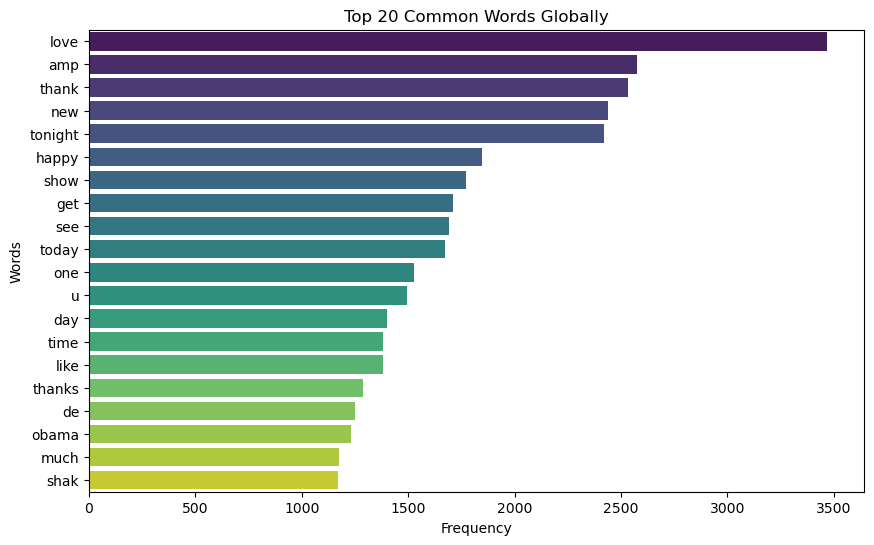

In [11]:
# Visualization: Most common words globally
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq.values, y=word_freq.index, palette="viridis")
plt.title("Top 20 Common Words Globally")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


# Finding Common Trends

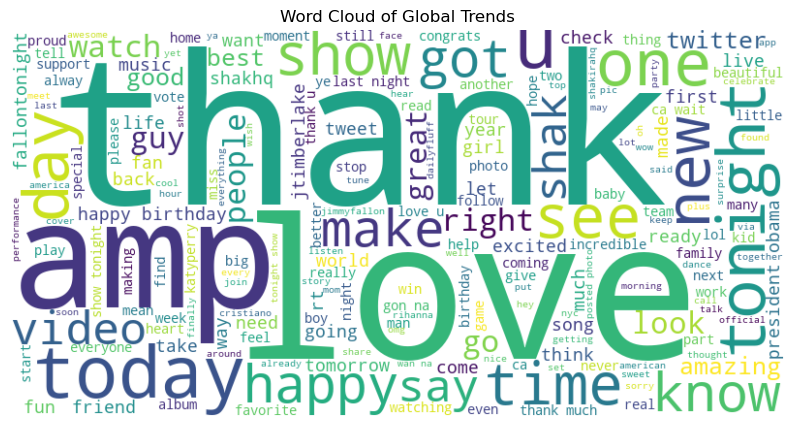

In [12]:
# Creating word clouds for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Global Trends")
plt.show()

# Exploring the Hot Trend

In [13]:
# Identify the trend with most mentions
hot_trend = word_freq.idxmax()
hot_trend_data = data[data['processed_text'].str.contains(hot_trend, na=False)]

print(f"Hot Trend Identified: {hot_trend}")
print(f"Total Mentions: {len(hot_trend_data)}")

Hot Trend Identified: love
Total Mentions: 4214


# Digging Deeper into Hot Trends

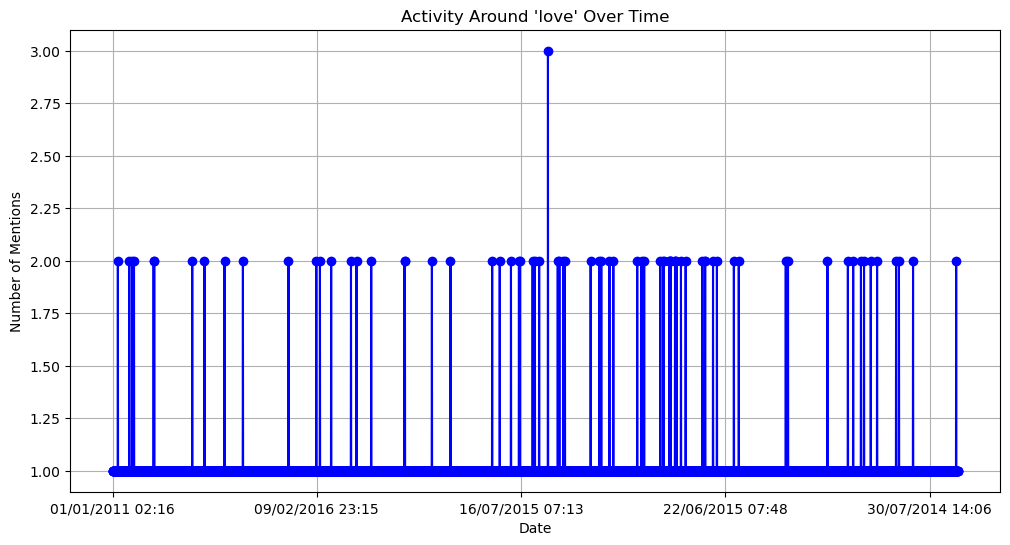

In [14]:
# Activity around the hot trend over time
trend_activity = hot_trend_data.groupby(hot_trend_data['date_time']).size()

plt.figure(figsize=(12, 6))
trend_activity.plot(kind='line', color='blue', marker='o')
plt.title(f"Activity Around '{hot_trend}' Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Mentions")
plt.grid(True)
plt.show()

# Frequency Analysis

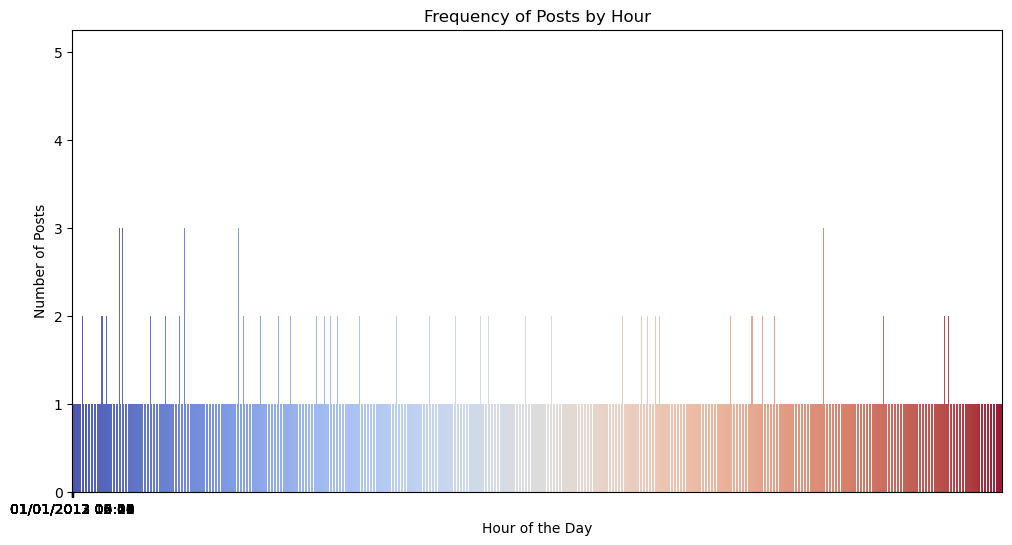

In [15]:
# Frequency of posts by hour
data['hour'] = data['date_time']
hourly_freq = data.groupby('hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_freq.index, y=hourly_freq.values, palette="coolwarm")
plt.title("Frequency of Posts by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Posts")
plt.xticks(range(0, 12))
plt.show()

# Analyzing Used Languages

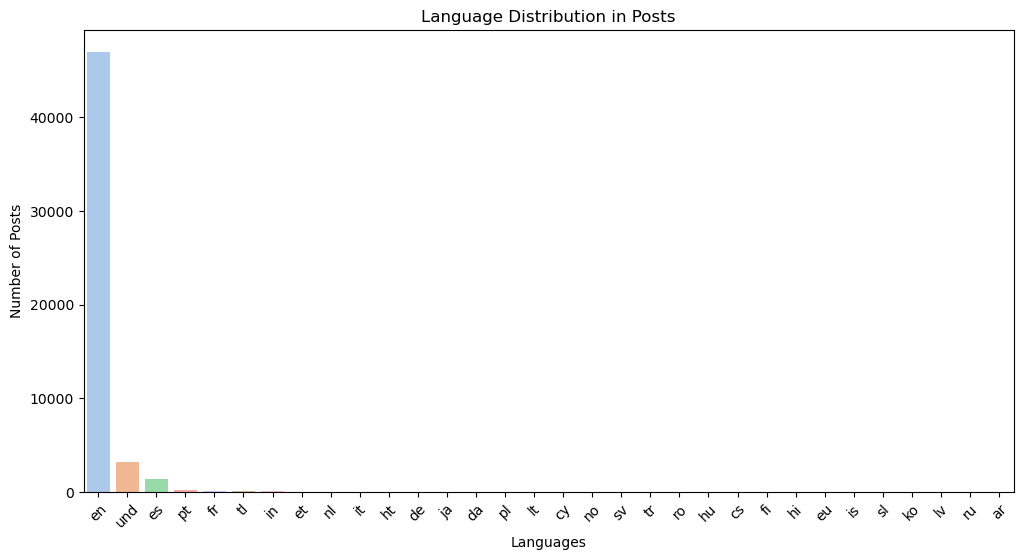

In [16]:
# Language analysis
if 'language' in data.columns:
    language_counts = data['language'].value_counts()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=language_counts.index, y=language_counts.values, palette="pastel")
    plt.title("Language Distribution in Posts")
    plt.xlabel("Languages")
    plt.ylabel("Number of Posts")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Language column not found in dataset.")


# Analysis Using Heatmap

            date_time        day  hour
0 2017-12-01 19:52:00     Friday  19.0
1 2017-11-01 08:38:00  Wednesday   8.0
2 2017-11-01 02:52:00  Wednesday   2.0
3 2017-11-01 02:44:00  Wednesday   2.0
4 2017-10-01 05:22:00     Sunday   5.0


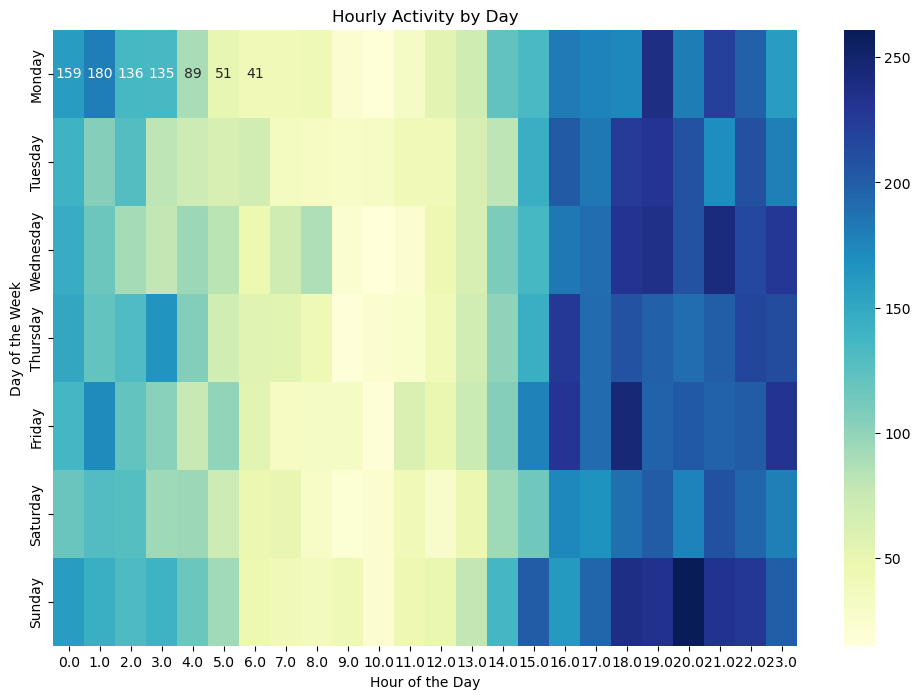

In [17]:
# Ensure 'date_time' is in datetime format (in case it's not)
data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')  # 'coerce' will handle any invalid parsing

# Extract day of the week and hour from 'date_time'
data['day'] = data['date_time'].dt.day_name()  # Get day of the week (e.g., Monday, Tuesday)
data['hour'] = data['date_time'].dt.hour  # Extract the hour from the datetime

# Check if the conversion was successful
print(data[['date_time', 'day', 'hour']].head())  # Print a sample to verify

# Group by day and hour, then count the number of posts
hourly_day_activity = data.groupby(['day', 'hour']).size().unstack(fill_value=0)  # Fill missing values with 0

# Sort the days to ensure they are ordered properly
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_day_activity = hourly_day_activity.reindex(ordered_days)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_day_activity, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Hourly Activity by Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


# Hashtag Analysis

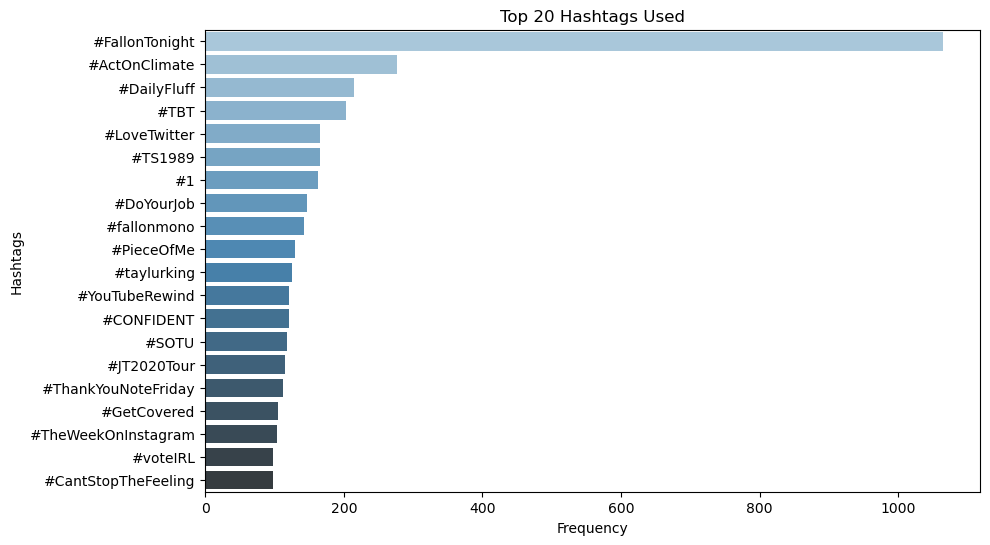

In [18]:
import re

# Extract hashtags
def extract_hashtags(text):
    return re.findall(r'\#\w+', text)

# Apply hashtag extraction
data['hashtags'] = data['content'].apply(extract_hashtags)

# Flatten the list of hashtags and count occurrences
all_hashtags = [hashtag for sublist in data['hashtags'] for hashtag in sublist]
hashtag_freq = pd.Series(all_hashtags).value_counts().head(20)

# Plot the most common hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtag_freq.values, y=hashtag_freq.index, palette="Blues_d")
plt.title("Top 20 Hashtags Used")
plt.xlabel("Frequency")
plt.ylabel("Hashtags")
plt.show()


# Time-Series Analysis 

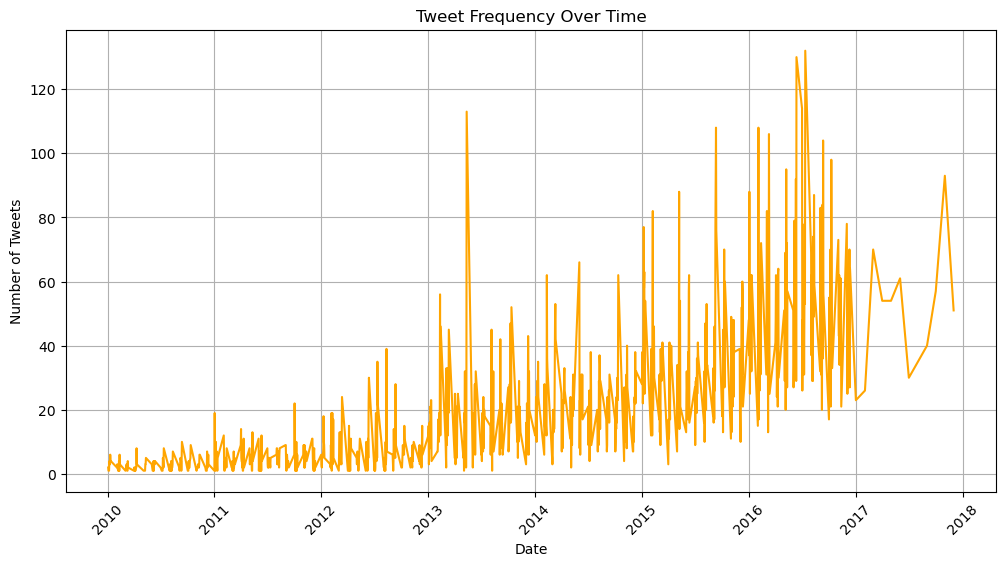

In [19]:
# Group by date to get tweet counts per day
daily_activity = data.groupby(data['date_time'].dt.date).size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_activity.index, daily_activity.values, color='orange')
plt.title("Tweet Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Engagement Analysis

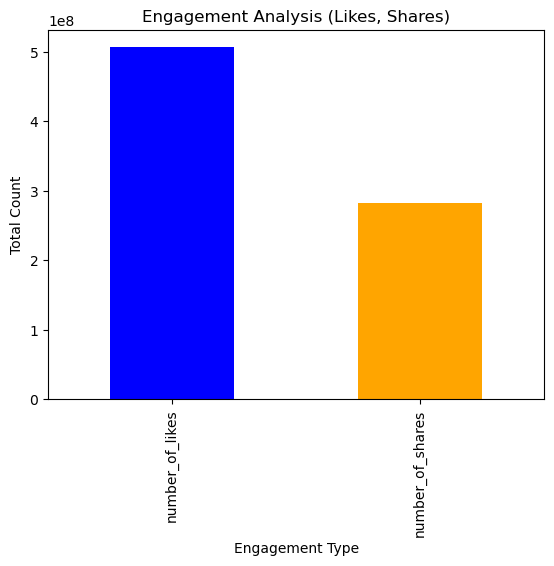

In [20]:
engagement_data = data[['number_of_likes', 'number_of_shares']].sum()

# Plot engagement metrics
engagement_data.plot(kind='bar', color=['blue', 'orange'])
plt.title("Engagement Analysis (Likes, Shares)")
plt.xlabel("Engagement Type")
plt.ylabel("Total Count")
plt.show()


# Topic Modeling

In [21]:
from gensim import corpora
from gensim.models import LdaModel

# Tokenize and prepare data for topic modeling
processed_docs = [text.split() for text in data['processed_text']]
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Build LDA model
lda = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display topics
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.060*"love" + 0.034*"thank" + 0.020*"much" + 0.016*"u" + 0.009*"guys"')
(1, '0.012*"hashtag" + 0.012*"new" + 0.011*"live" + 0.010*"dailyfluff" + 0.010*"weekend"')
(2, '0.015*"happy" + 0.012*"one" + 0.012*"day" + 0.010*"night" + 0.010*"last"')
(3, '0.034*"shak" + 0.033*"de" + 0.025*"shakhq" + 0.020*"en" + 0.019*"la"')
(4, '0.028*"tonight" + 0.018*"fallontonight" + 0.015*"new" + 0.015*"show" + 0.014*"amp"')


# Compare trends: comparing two hashtags

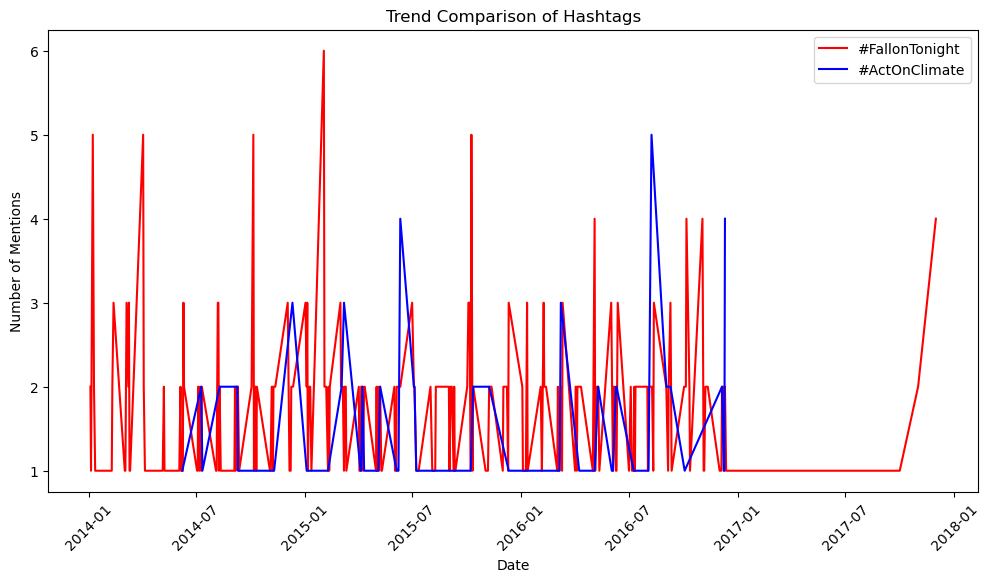

In [22]:
hashtag1 = data[data['content'].apply(lambda x: '#FallonTonight' in x)]
hashtag2 = data[data['content'].apply(lambda x: '#ActOnClimate' in x)]

hashtag1_activity = hashtag1.groupby(hashtag1['date_time'].dt.date).size()
hashtag2_activity = hashtag2.groupby(hashtag2['date_time'].dt.date).size()

plt.figure(figsize=(12, 6))
plt.plot(hashtag1_activity.index, hashtag1_activity.values, label='#FallonTonight', color='red')
plt.plot(hashtag2_activity.index, hashtag2_activity.values, label='#ActOnClimate', color='blue')
plt.title("Trend Comparison of Hashtags")
plt.xlabel("Date")
plt.ylabel("Number of Mentions")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# A Table that Speaks a Thousand Words

In [23]:
# Generating a summary table
summary_table = pd.DataFrame({
    "Top Words": word_freq.index[:10],
    "Frequency": word_freq.values[:10]
})
print(summary_table)

  Top Words  Frequency
0      love       3469
1       amp       2575
2     thank       2532
3       new       2440
4   tonight       2419
5     happy       1848
6      show       1772
7       get       1710
8       see       1690
9     today       1675


In [24]:
summary_table.to_csv("summary_table.csv", index=False)

# Word Cloud

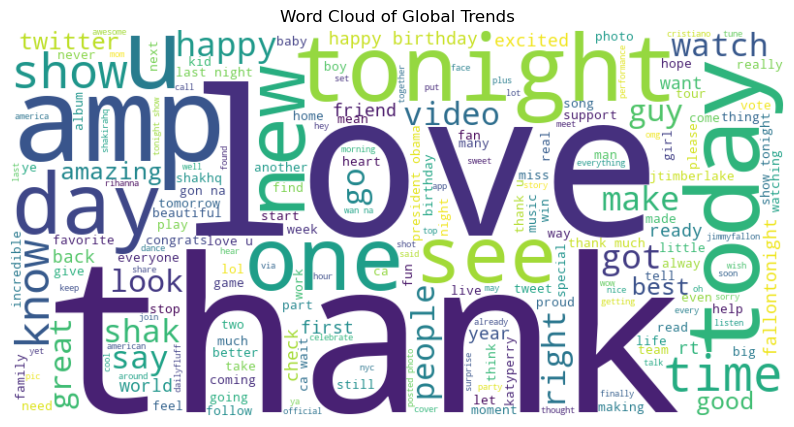

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Global Trends")
plt.show()

# THANK YOU!!! 